In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
import matplotlib.image as mpimg
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *

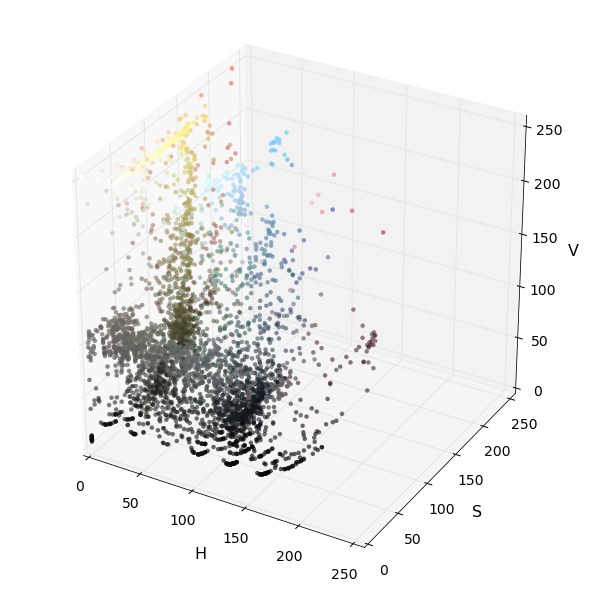

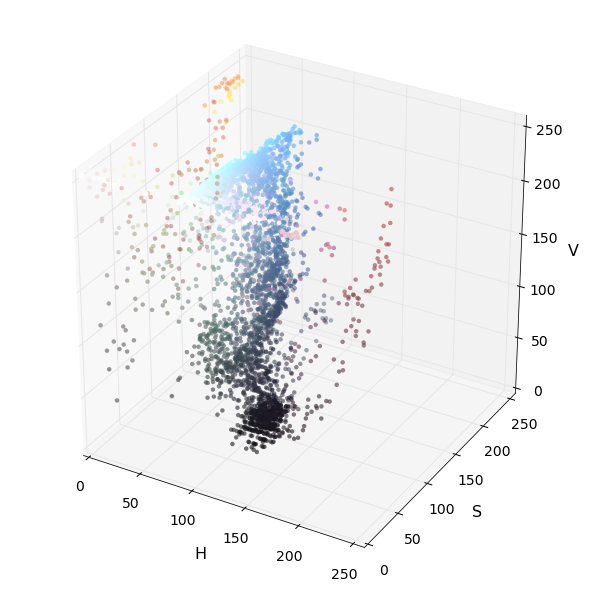

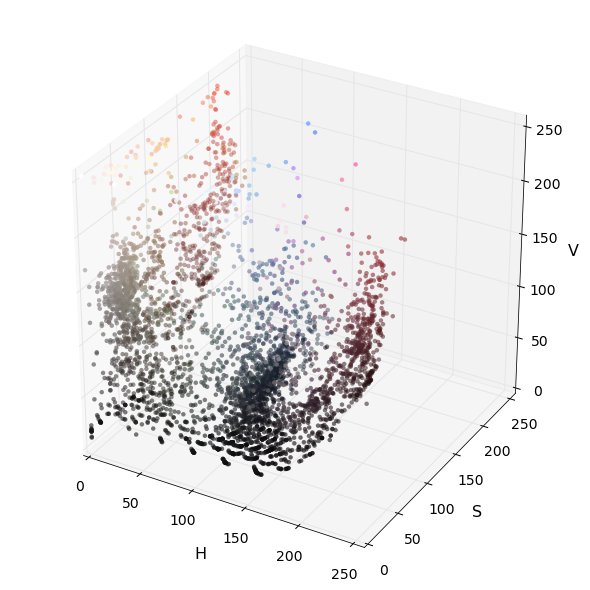

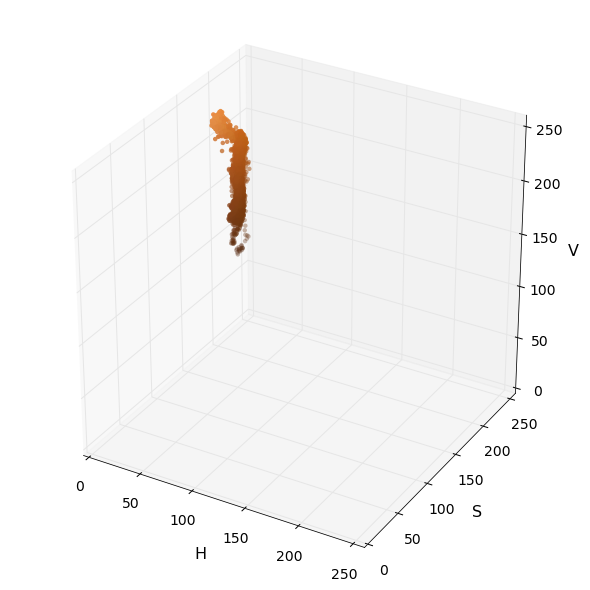

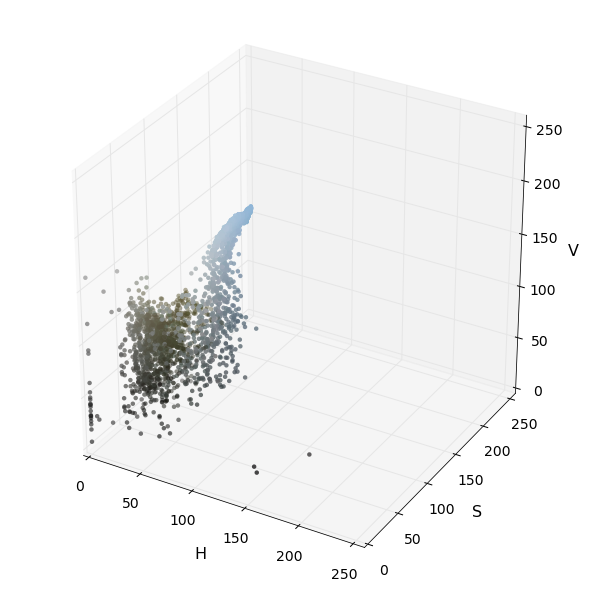

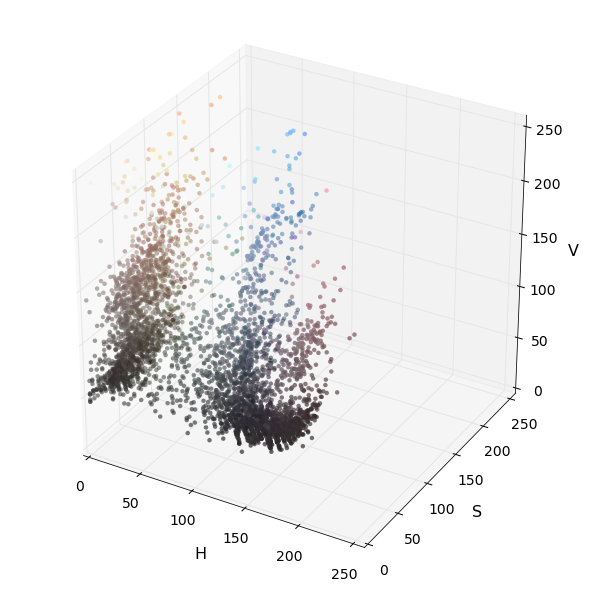

In [2]:
### Trying different Color Spaces

def plot3d(pixels, colors_rgb,
        axis_labels=list("HSV"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
#img = cv2.imread("test_color_spaces/nocar1.png")
images = [cv2.imread(file) for file in glob.glob("test_color_spaces/*.png")]  #BGR

for img in images:
    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSL = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2YCrCb)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

    
    # Plot and show
    #plot3d(img_small_RGB, img_small_rgb)
    #plt.show()

    #plot3d(img_small_HSL, img_small_rgb, axis_labels=list("HLS"))
    #plt.show()

    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()

    ##plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
    #plt.show()

In [3]:
### Prepare DATASET
'''
cv2.imread() with png, [0,255], BGR
mpimg.imread() with png, [0,1], RGB
mpimg.imread() with jpg, [0,255], RGB
'''

# Read in cars and notcars
images_notcars = glob.glob('dataset/non-vehicles/**/*.png')
images_cars = glob.glob('dataset/vehicles/**/*.png')
cars = []
notcars = []
for image in images_notcars:
    notcars.append(image)
print("Total not cars images in dataset: ", len(notcars))
    
for image in images_cars:
    cars.append(image)    
print("Total cars images in dataset: ", len(cars))



Total not cars images in dataset:  8968
Total cars images in dataset:  8792


In [36]:
###  Set parameters 
color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] #656 # Min and max in y to search in slide_window()
scale = 1.0

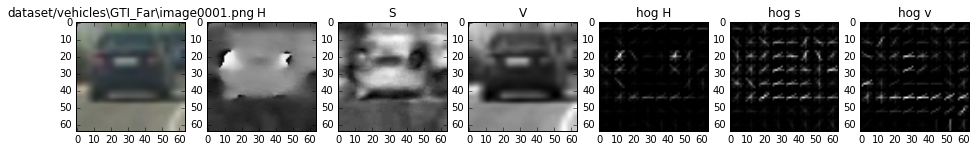

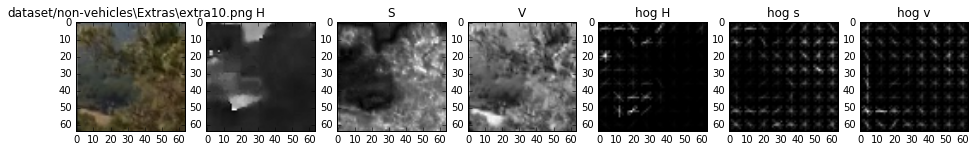

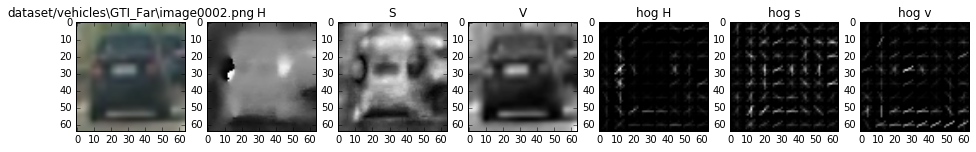

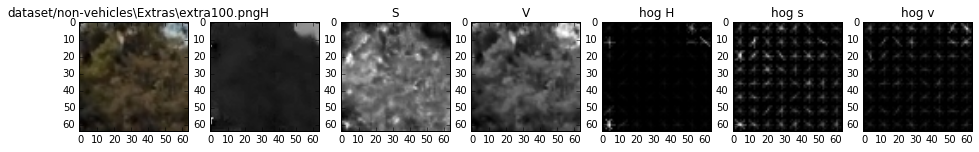

In [37]:
#Show HOG images

def showHogExample(file):
    image = mpimg.imread(file)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    fig = plt.figure(figsize=(16, 16))
    plt.subplot(171)
    plt.imshow(image)
    plt.title(file)
    plt.subplot(172)
    plt.imshow(image_hsv[:,:,0],cmap='gray')
    plt.title('H')
    plt.subplot(173)
    plt.imshow(image_hsv[:,:,1],cmap='gray')
    plt.title('S')
    plt.subplot(174)
    plt.imshow(image_hsv[:,:,2],cmap='gray')
    plt.title('V')
    hog_features, hog_image = hog(image_hsv[:,:,0], orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

    plt.subplot(175)
    plt.imshow(hog_image,cmap='gray')
    plt.title('hog H')
    hog_features, hog_image = hog(image_hsv[:,:,1], orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

    plt.subplot(176)
    plt.imshow(hog_image,cmap='gray')
    plt.title('hog s')
    hog_features, hog_image = hog(image_hsv[:,:,2], orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

    plt.subplot(177)
    plt.imshow(hog_image,cmap='gray')
    plt.title('hog v')
    plt.show()
    
    return

for i in range(1,3):
    ind = np.random.randint(0, len(cars))
    showHogExample(cars[i])
    showHogExample(notcars[i])
    

In [5]:
### Train classifier
from sklearn import svm, grid_search, datasets
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *
from sklearn.cross_validation import train_test_split

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Select best SVC 
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svr = svm.SVC()
#svc = grid_search.GridSearchCV(svr, parameters)
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

C:\Users\ernesto\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
17.65 Seconds to train SVC...
Test Accuracy of SVC =  0.9887


In [6]:
#Save clasiffier to disk

import pickle

dist_pickle = {}
dist_pickle["svc"] = svc
dist_pickle["scaler"] = X_scaler
dist_pickle["orient"] = orient
dist_pickle["pix_per_cell"] = pix_per_cell
dist_pickle["cell_per_block"] = cell_per_block
dist_pickle["spatial_size"] = spatial_size
dist_pickle["hist_bins"] = hist_bins
dist_pickle["color_space"] = color_space
dist_pickle["hog_channel"] = hog_channel
dist_pickle["spatial_feat"] = spatial_feat
dist_pickle["hist_feat"] = hist_feat
dist_pickle["hog_feat"] = hog_feat

pickle.dump(dist_pickle, open("my_classifier.p","wb"))


In [75]:
#Open classifier from disk
import pickle

dist_pickle = pickle.load( open("my_classifier.p", "rb" ) )

svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"] 
color_space = dist_pickle["color_space"]
hog_channel = dist_pickle["hog_channel"]
spatial_feat = dist_pickle["spatial_feat"]
hist_feat = dist_pickle["hist_feat"]
hog_feat = dist_pickle["hog_feat"]

dist_pickle = pickle.load( open("my_classifier_gridsearch.p", "rb" ) )


In [ ]:
from scipy.ndimage.measurements import label

def process_image(img):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    image = img.astype(np.float32)/255

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
              xy_window=(96, 96), xy_overlap=(0.8, 0.2), scale=1.1)

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       


    #window_img = draw_boxes(img, hot_windows, color=(0, 0, 255), thick=6)                    

    #fig = plt.figure(figsize=(12, 12))
    #plt.subplot(121)
    #plt.imshow(window_img)
    
    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
   
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    #plt.subplot(122)
    #plt.imshow(draw_img)
    #plt.imshow(heatmap, cmap='hot')
    
    #plt.imshow(labels[0], cmap='gray')
    plt.show()
    
    return draw_img

img = mpimg.imread('test_images/test1.jpg')
process_image(img)
img = mpimg.imread('test_images/test2.jpg')
process_image(img)
img = mpimg.imread('test_images/test3.jpg')
process_image(img)
img = mpimg.imread('test_images/test4.jpg')
process_image(img)
img = mpimg.imread('test_images/test5.jpg')
process_image(img)
img = mpimg.imread('test_images/test6.jpg')
process_image(img)


In [72]:
from moviepy.editor import VideoFileClip


project_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(process_image) 
%time project_clip.write_videofile(project_output, audio=False)


[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|███████████████████████████████████████████████████████████████████████████▉| 1260/1261 [2:26:23<00:02,  2.52s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 2h 26min 24s


In [74]:
from IPython.core.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))